In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading data

## Data z invertoru solární elektrárny
### 9.9 Kwp rozdělené na dva stringy 

In [32]:
dataraw = pd.read_csv("data\datacsvnaexport.csv", sep = ";")
dataraw.head()



,update time,PV1 voltage (V),PV1 current (A),PV1 input power(W),PV2 voltage (V),PV2 current (A),PV2 input power(W),AC current R(A),AC voltage R(V),AC current S(A),...,feed-in energy(kWh),consume energy(kWh),EPS active power R(W),EPS active power S(W),EPS active power T(W),EPS apparent power R(VA),EPS apparent power S(VA),EPS apparent power T(VA),Inverter Status,Battery operating status
0,2023-03-16 00:01:42,0,0,0,0,0,0,0,0,0,...,"0,9","663,22",0,0,0,0,0,0,IdleMode,Normal
1,2023-03-16 00:06:42,0,0,0,0,0,0,0,0,0,...,"0,9","663,27",0,0,0,0,0,0,IdleMode,Normal
2,2023-03-16 00:11:42,0,0,0,0,0,0,0,0,0,...,"0,9","663,33",0,0,0,0,0,0,IdleMode,Normal
3,2023-03-16 00:16:42,0,0,0,0,0,0,0,0,0,...,"0,9","663,39",0,0,0,0,0,0,IdleMode,Normal
4,2023-03-16 00:21:42,0,0,0,0,0,0,0,0,0,...,"0,9","663,45",0,0,0,0,0,0,IdleMode,Normal


## Sluneční svit 
### do 31.12.2023 podle ČHMU nejbližší stanice Poděbrady

In [35]:
slun_svit = pd.read_csv("data\chmu_slun_svit\H3PODE01_SSV_N.csv", sep = ";")
slun_svit = slun_svit.drop("Unnamed: 4", axis = 1)
slun_svit.head()

,Rok,Mesic,Den,Hodnota
0,2010,1,1,0.0
1,2010,1,2,0.0
2,2010,1,3,0.0
3,2010,1,4,1.3
4,2010,1,5,4.3


## Globální iradiace
### do 31.12.2023 podle ČHMU nejbližší stanice Hradec Králové
Denní souhrn globálního záření [RGLB_D.SUM, kJ/m2]

In [38]:
iradiace = pd.read_csv("data\chmu_glob_iradiace\H3HRAD01_RGLB_D_SOLAR.csv", sep = ";")
iradiace = iradiace.drop("Unnamed: 4", axis = 1)
iradiace.head()

,Rok,Mesic,Den,Hodnota
0,2010,1,1,1470
1,2010,1,2,2092
2,2010,1,3,2818
3,2010,1,4,1830
4,2010,1,5,3083


# Data preparation

# Visualization 

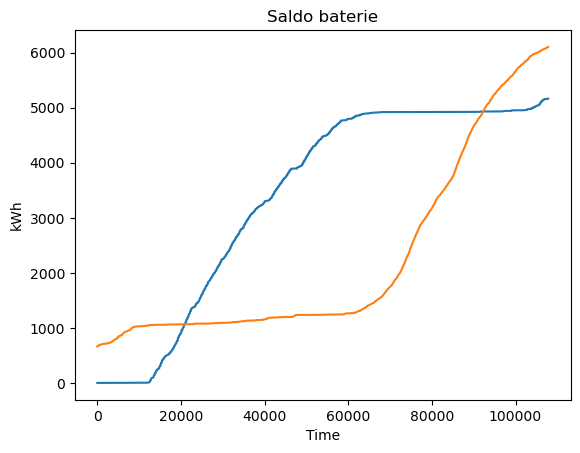

In [ ]:

dataraw["feed-in energy(kWh)"] = pd.to_numeric(dataraw["feed-in energy(kWh)"].str.replace(',', '.'), errors='coerce')
dataraw["consume energy(kWh)"] = pd.to_numeric(dataraw["consume energy(kWh)"].str.replace(',', '.'), errors='coerce')

window_size = 20
smoothedfeedin = dataraw["feed-in energy(kWh)"].rolling(window=window_size).mean()
smoothedconsume = dataraw["consume energy(kWh)"].rolling(window=window_size).mean()

plt.plot(smoothedfeedin, label="Feed In energy")
plt.plot(smoothedconsume, label="Consumed energy")

plt.xlabel("Time")
plt.ylabel("kWh")
plt.title("Saldo baterie")
plt.show()